<a href="https://colab.research.google.com/github/mikias-wondim/Crop_Yield_Prediction_Regression_Neural_Network_Model_in_TensorFlow/blob/main/crop_yield_prediction_neural_network_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Regression
Regression using neural networks in TensorFlow involves training a model to predict a continuous numerical value (the target variable) based on a set of input features. Here's a general overview of the process:

1. Data Preparation:

Gather your dataset containing input features and the target variable.
Preprocess the data by scaling and normalizing the features.
Split the data into training and validation sets.

2. Model Architecture:

Define the neural network architecture using the TensorFlow Keras API.
Choose an appropriate activation function for the output layer based on the nature of the target variable (e.g., linear for continuous values).
Define the loss function and optimizer to train the model.

3. Model Training:

Train the model using the fit() method, specifying the training data, number of epochs, and validation data.
Monitor the training process and evaluate the model's performance on the validation set.

4. Predictions:

Once trained, use the model to predict the target variable for new unseen input features.



In [ ]:
# Importing pandas library
import pandas as pd

# Load the sample data into a Pandas DataFrame
data = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Spliting the feature to target from the dataset
train_data = data.iloc[:, 0:9]
test_data = data.iloc[:, -1]

In [ ]:
# Scale the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_data,
                                                  test_data,
                                                  test_size=0.2)

In [ ]:
import tensorflow as tf

# Define the model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model with loss function of MSE and Adam's Optimizer
model.compile(loss='mse', optimizer= tf.keras.optimizers.Adam(), metrics=['mse'])

# Fit (Train) the model with 50 epochs, also uses a validation data
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=0)

In [ ]:
# Importing test set
test_data = pd.read_csv('/content/sample_data/california_housing_test.csv')
X_test_data = test_data.iloc[:, 0:9]
y_test_data = test_data.iloc[:, -1]

# Evaluate the model on the test set
loss = model.evaluate(X_test_data, y_test_data)
print(f'Validation loss: {loss}')

94/94 [==============================] - 0s 2ms/step - loss: 318470141371219968.0000 - mse: 318470141371219968.0000
Validation loss: [3.1847014137122e+17, 3.1847014137122e+17]


### Ways of improving the model
* One basic and crucial way to improve a deep model would be to tweak the hyperparameters

**A hyperparameter** is a parameter whose value is set before the learning process begins. This is in contrast to model parameters, which are learned during the training process.

Some basic and important hyperparameters in deep learning include:

* **Learning rate**: This determines how quickly the model updates its parameters based on the training data.
* **Batch size** : This is the number of training examples used in each iteration of the training process.
* **Number of epochs**: This is the number of times the model iterates through the entire training dataset.
* **Number of layers**: This is the number of hidden layers in the model.
* **Number of units per layer**: This is the number of neurons in each hidden layer.
* **Activation function**: This is the function used to compute the output of each neuron.
* **Optimizer**: This is the algorithm used to update the model's parameters.
* **Regularization parameters**: These are parameters used to prevent overfitting, such as the L1 or L2 penalty.

In [ ]:
# Lets tweak the number of layers, activation function, number of epoch

# Define the model using Sequential API with one extra layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model with loss function of MSE and Adam's Optimizer
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(), metrics=['mse'])

# Fit (Train) the model with 50 epochs, also uses a validation data
model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

In [ ]:
import numpy as np

# Evaluate the new model on the test set
previous_loss = loss
loss = model.evaluate(X_test_data, y_test_data)
print(f'Previous Validation loss: {loss}')
print(f'Validation loss: {loss}')
print(f'The difference in loss is: {np.array(previous_loss) - np.array(loss)}')

94/94 [==============================] - 0s 4ms/step - loss: 89602413121419345920.0000 - mse: 89602413121419345920.0000
Previous Validation loss: [8.960241312141935e+19, 8.960241312141935e+19]
Validation loss: [8.960241312141935e+19, 8.960241312141935e+19]
The difference in loss is: [0. 0.]


### Building and Saving a Model
There are **two** formats of saving a model
1. **SaverModel** is the default format for saving TensorFlow models. It saves the model definition, the weights, and the optimizer state. This format is typically used when you want to save a model that you can later restore and continue training.

1. **H5** is a HDF5 file format that can be used to save TensorFlow models. It saves only the weights of the model, not the model definition or the optimizer state. This format is typically used when you want to save a model that you have trained and you don't need to be able to restore it and continue training.


**Note:** If you want to save a model that you can later restore and continue training, you should use the **SaverModel** format. If you want to save a model that you have trained and you don't need to be able to restore it and continue training, you can use the H5 format.


First lets preprocess out data

In [ ]:
# Lets build a model from scratch based on dataset from the sampledata in colab

# Import libraries
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Importing dataset
dataset = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Separating feature and target from the dataset
X = dataset.drop('median_house_value', axis=1)
y = dataset['median_house_value']

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data = scaler.fit_transform(X)

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.2)

Now lets build our deep net model

In [ ]:
# Set the seed
tf.random.set_seed(21)

# 1. Create the model
housing_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
housing_model.compile(loss=tf.keras.losses.MeanSquaredError(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=['mse'])

# 3. Fit the model
history = housing_model.fit(X_train, y_train, epochs=50)

Epoch 1/50
425/425 [==============================] - 2s 2ms/step - loss: 43054309376.0000 - mse: 43054309376.0000
Epoch 2/50
425/425 [==============================] - 1s 2ms/step - loss: 27471835136.0000 - mse: 27471835136.0000
Epoch 3/50
425/425 [==============================] - 1s 2ms/step - loss: 26661926912.0000 - mse: 26661926912.0000
Epoch 4/50
425/425 [==============================] - 1s 2ms/step - loss: 26056802304.0000 - mse: 26056802304.0000
Epoch 5/50
425/425 [==============================] - 1s 3ms/step - loss: 25256220672.0000 - mse: 25256220672.0000
Epoch 6/50
425/425 [==============================] - 1s 3ms/step - loss: 24346105856.0000 - mse: 24346105856.0000
Epoch 7/50
425/425 [==============================] - 1s 2ms/step - loss: 23316078592.0000 - mse: 23316078592.0000
Epoch 8/50
425/425 [==============================] - 1s 2ms/step - loss: 22144952320.0000 - mse: 22144952320.0000
Epoch 9/50
425/425 [==============================] - 1s 2ms/step - loss: 208927

In [ ]:
# Evaluating the prediction(performance) of the model
housing_model.evaluate(X_test, y_test)

107/107 [==============================] - 1s 3ms/step - loss: 9443993600.0000 - mse: 9443993600.0000


[9443993600.0, 9443993600.0]

Make some changes on the number of layers and hidden units, as well as the learning rate and number of epochs

In [ ]:
# Set the seed
tf.random.set_seed(21)

# 1. Create the model
housing_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
housing_model.compile(loss=tf.keras.losses.MeanSquaredError(),
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                      metrics=['mse'])

# 3. Fit the model
history = housing_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
425/425 [==============================] - 2s 3ms/step - loss: 31445794816.0000 - mse: 31445794816.0000
Epoch 2/100
425/425 [==============================] - 1s 3ms/step - loss: 19681918976.0000 - mse: 19681918976.0000
Epoch 3/100
425/425 [==============================] - 1s 3ms/step - loss: 11758156800.0000 - mse: 11758156800.0000
Epoch 4/100
425/425 [==============================] - 1s 3ms/step - loss: 11111197696.0000 - mse: 11111197696.0000
Epoch 5/100
425/425 [==============================] - 1s 3ms/step - loss: 10755203072.0000 - mse: 10755203072.0000
Epoch 6/100
425/425 [==============================] - 2s 4ms/step - loss: 10467698688.0000 - mse: 10467698688.0000
Epoch 7/100
425/425 [==============================] - 1s 3ms/step - loss: 10147547136.0000 - mse: 10147547136.0000
Epoch 8/100
425/425 [==============================] - 1s 3ms/step - loss: 9793576960.0000 - mse: 9793576960.0000
Epoch 9/100
425/425 [==============================] - 1s 3ms/step - loss:

In [ ]:
# Evaluate the model
housing_model.evaluate(X_test, y_test)

107/107 [==============================] - 0s 2ms/step - loss: 4270445312.0000 - mse: 4270445312.0000


[4270445312.0, 4270445312.0]

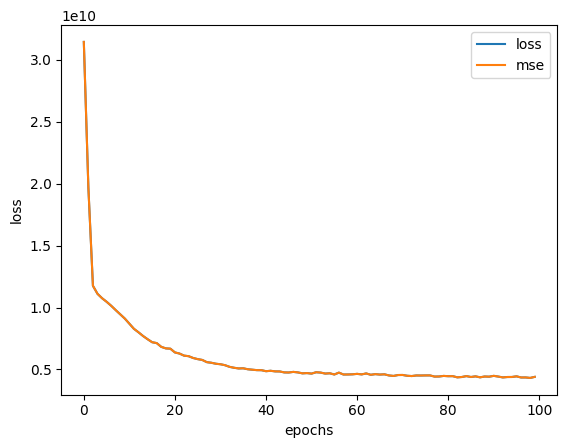

In [ ]:
# Lets visualize the learning rate or learning curve

# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

### Now lets save our model

In [ ]:
# Using default SaverModel format
housing_model.save('housing_model_SaverModel_format')

In [ ]:
# Using the HDF5 format (Although, HDF5 file format is considered legacy)
housing_model.save('housing_model_HDF5_format.h5')

# It's recommended to save using the native Keras format
model.save('housing_model_Keras_format.keras')

### Loading models and check if they are the same as the saved one

In [ ]:
# Loading the SaverModel formated model
loaded_housing_model_1 = tf.keras.models.load_model('/content/housing_model_SaverModel_format')
loaded_housing_model_1.summary()

In [ ]:
# Loading the HDF5 format model
loaded_housing_model_2 = tf.keras.models.load_model('/content/housing_model_HDF5_format.h5')
loaded_housing_model_2.summary()

### Downloading a model (from Google Colab)
Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:

Right click on the file in the files pane and click 'download'.
Use the code below.

In [ ]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("housing_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Building Large Model - Crop Yield Regression Problem

**About Dataset**

The dataset is from Kaggle, a publicly avialable dataset repository. The data represents the production of crops per area in India . It mainly has the area , production and yield statistics. It contains the data for various crops and how they are produced district , state and year wise.


The developed regression model aims to predict crop yield based on various features such as state, district, crop, crop year, season, area, and production. This model can be valuable for farmers, agricultural researchers, and policymakers in understanding the factors influencing crop yield and making informed decisions.

The model architecture consists of multiple dense layers with ReLU activations for the hidden layers and a linear activation for the output layer. This structure allows the model to learn complex non-linear relationships between the input features and the target variable.

### Preprocessing the data
* Import libraries
* Import the dataset
* Handle missing values

In [ ]:
# Importing libraries
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Data Preprocessing
# Importing dataset
dataset = pd.read_csv('/content/drive/MyDrive/dataset/crop_yield/Crop_Production_Statistics.csv')
dataset.dropna(inplace=True) # removes entries with missing element


Index(['State', 'District ', 'Crop', 'Crop_Year', 'Season', 'Area ',
       'Production', 'Yield'],
      dtype='object')

### Feature Scaling (normalization and standardization)

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called **normalization** (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call **standardization** which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:
* Turning all of your data to numbers (a neural network can't handle strings).
* Making sure your data is in the right shape (verifying input and output shapes).
* [**Feature scaling**](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler):
    * Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minimum. This is also referred to as min-max scaling.
    * Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by subtracting the mean value from the target feature and then dividing it by the standard deviation.
    * Which one should you use?
      * **With neural networks you'll tend to favour normalization** as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.
  * The `make_column_transformer` function in scikit-learn is used to create a pipeline that applies different transformations to different columns of your data. It allows you to combine multiple transformers into a single pipeline, making it easier to pre-process your data before feeding it to a machine learning model. In our model we use this transformer to pipeline feature scaling and categorical encoding

In [ ]:
# Feature Scaling and Categorical Encoding using One Hot Encoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['Crop_Year', 'Area ', 'Production']),
    (OneHotEncoder(handle_unknown='ignore'), ['State', 'District ', 'Crop', 'Season'])
)

# Create X & y
X = dataset.drop("Yield", axis=1)
y = dataset["Yield"]

# Build the train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Again from out training set we split the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=21)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)
X_val_normal = ct.transform(X_val)

**Notice:**


There occured an error while transforming the columns, it changed their object type into `SparseTensor`, which doesn't work with `Dense` layers, Therefore we needed to change the object type by converting the scaled and encoded data into dense type, in the following cell

In [ ]:
# Convert the sets of SparseTensors into a format that can be supported by Dense layers
X_train_dense = X_train_normal.toarray()
X_val_dense = X_val_normal.toarray()
X_test_dense = X_test_normal.toarray()

### Lets build our Deep Net Model with our preprocessed data
Steps to build the model
1. Create the model with Sequential API using only 2 Layers with 10 hidden unit at the first layer
2. Compile the model with loss function of MSE and optimizer of SGD with default learning rate, we use the metrics of MSE
3. Fit the model with our training set and validation set for 50 epochs

* The `validation_data` argument is a tuple containing the validation data and the validation labels. The fit method will use the validation data to evaluate the model's performance during training

In [ ]:
# Set the seed to ensure reproduciblity
tf.random.set_seed(21)

# 1. Create the model
crop_yield_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train_normal.shape[1],)),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
crop_yield_model_1.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mse']
)

# 3. Fit the model with train and validation set
model_learning_history = crop_yield_model_1.fit(X_train_dense, y_train, epochs=5, validation_data=(X_val_dense , y_val))

Epoch 1/5
6808/6808 [==============================] - 25s 4ms/step - loss: 877542.1875 - mse: 877542.1875 - val_loss: 833787.3750 - val_mse: 833787.3750
Epoch 2/5
6808/6808 [==============================] - 21s 3ms/step - loss: 876589.6250 - mse: 876589.6250 - val_loss: 833762.3750 - val_mse: 833762.3750
Epoch 3/5
6808/6808 [==============================] - 21s 3ms/step - loss: 876630.1250 - mse: 876630.1250 - val_loss: 833586.6875 - val_mse: 833586.6875
Epoch 4/5
6808/6808 [==============================] - 22s 3ms/step - loss: 876569.5625 - mse: 876569.5625 - val_loss: 834051.8750 - val_mse: 834051.8750
Epoch 5/5
6808/6808 [==============================] - 21s 3ms/step - loss: 876603.3125 - mse: 876603.3125 - val_loss: 833571.5625 - val_mse: 833571.5625


In [ ]:
# The next step is to evaluate our model against the test set
y_pred = crop_yield_model_1.predict(X_test_dense)
y_pred, X_test_dense

2128/2128 [==============================] - 3s 2ms/step


(array([[78.012566],
        [78.012566],
        [78.012566],
        ...,
        [78.012566],
        [78.012566],
        [78.012566]], dtype=float32),
 array([[1.30434783e-01, 3.55462058e-05, 1.02015271e-07, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [5.21739130e-01, 5.39852683e-04, 1.12780073e-05, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.91304348e-01, 9.17227073e-05, 2.67054700e-05, ...,
         0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
        ...,
        [1.73913043e-01, 1.51978415e-04, 1.27049693e-07, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [6.08695652e-01, 3.11499750e-03, 2.16208537e-01, ...,
         0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
        [3.04347826e-01, 1.16537103e-05, 6.25860558e-08, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]))

In [ ]:
# Checking the loss against the mean of the

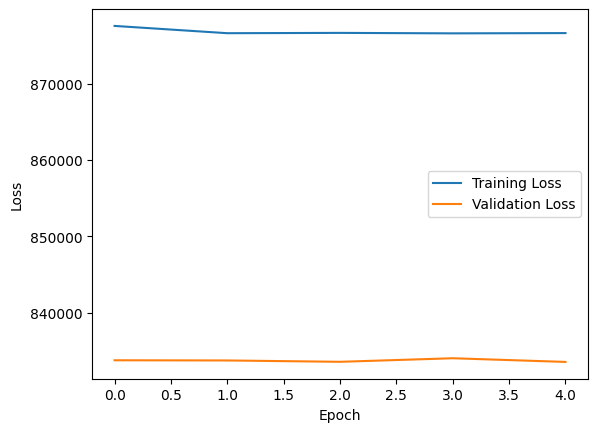

In [ ]:
# Visualizing the learning Curve
import matplotlib.pyplot as plt

# Plot the training loss and validation loss over time
plt.plot(model_learning_history.history['loss'], label='Training Loss')
plt.plot(model_learning_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### The Performance of the upper model is very bad and this needs to be improved

## Improving our model
The crucial hyperparameters to tune in order to improve the performance of our model include:

1. Learning rate: The learning rate determines how quickly the model learns. A higher learning rate will lead to faster learning, but it can also lead to overfitting. A lower learning rate will lead to slower learning, but it can help to prevent overfitting.
2. Number of epochs: The number of epochs determines how many times the model will train on the entire training dataset. A higher number of epochs will lead to better training, but it can also lead to overfitting. A lower number of epochs will lead to faster training, but it can result in underfitting.
3. Batch size: The batch size determines how many samples the model will train on at each iteration. A larger batch size will lead to faster training, but it can also lead to overfitting. A smaller batch size will lead to slower training, but it can help to prevent overfitting.
4. Regularization parameters: Regularization parameters control the complexity of the model. Higher regularization parameters will lead to a simpler model, which can help to prevent overfitting. Lower regularization parameters will lead to a more complex model, which can lead to better training.
5. Early stopping is a technique used in machine learning to stop the training of a model when the model's performance on a validation set stops improving. This helps to prevent overfitting and can save time and resources.
6. Optimizer: An optimizer is an algorithm that is used to update the parameters of a deep learning model. The goal of an optimizer is to minimize the loss function of the model. For a semi-complex regression deep net model, Adam is generally a better choice than SGD. This is because Adam is less sensitive to the learning rate and it can help to prevent overfitting
7. Number of Layers and Neurons: Generally, Increasing the number of layers and neurons in a deep neural network can have the following effects:

    * Increased accuracy: A deep neural network with more layers and neurons can learn more complex relationships in the data, which can lead to increased accuracy.
    * Increased overfitting: A deep neural network with more layers and neurons is also more likely to overfit the training data. This is because the network has more parameters to learn, which gives it more opportunities to memorize the training data.
    * Increased training time: A deep neural network with more layers and neurons will take longer to train. This is because the network has more parameters to update during each iteration of training.
Therefore, the number of layers and neurons should be increased gradually: Don't double the number of layers or neurons all at once. Instead, increase the number of layers or neurons by a small amount and see how the performance of the model changes.

### Building improved model

### Techniques to improve

* **Early stopping** works by monitoring the model's performance on a validation set after each epoch. If the model's performance on the validation set does not improve for a certain number of epochs, then the training is stopped. The patience parameter in early stopping is the number of epochs to wait for improvement in the model's performance on the validation set before stopping training.
* **Regularization** works by adding a penalty term to the loss function of the model. This penalty term discourages the model from learning weights that are too large. As a result, the model is less likely to overfit the training data. There are two main types of regularization:

    * L1 regularization: adds the absolute value of the weights to the loss function. This type of regularization is also known as Lasso regression.
    * L2 regularization: adds the squared value of the weights to the loss function. This type of regularization is also known as Ridge regression.


In [ ]:
# Checking the input (feature) shape
(X_train_normal.shape[1],)

(804,)

In [ ]:
# Now get to work

# Set seed
tf.random.set_seed(21)

# 1. Create our model
crop_yield_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_normal.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
crop_yield_model_2.compile(loss='mean_squared_error',
                           optimizer='adam',
                           metrics=['mean_absolute_error'])

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)

# 3. Fit the model
history = crop_yield_model_2.fit(X_train_dense, y_train, epochs=50,
                       validation_data=(X_val_dense, y_val),
                       callbacks=[early_stopping])

Epoch 1/50
6808/6808 [==============================] - 31s 4ms/step - loss: 153449.2188 - mean_absolute_error: 31.9916 - val_loss: 99726.4531 - val_mean_absolute_error: 26.7852
Epoch 2/50
6808/6808 [==============================] - 31s 4ms/step - loss: 96140.6016 - mean_absolute_error: 22.4639 - val_loss: 78307.0156 - val_mean_absolute_error: 20.1772
Epoch 3/50
6808/6808 [==============================] - 30s 4ms/step - loss: 93621.1016 - mean_absolute_error: 21.5409 - val_loss: 80254.4375 - val_mean_absolute_error: 19.3738
Epoch 4/50
6808/6808 [==============================] - 30s 4ms/step - loss: 91735.6484 - mean_absolute_error: 20.8955 - val_loss: 76207.8203 - val_mean_absolute_error: 18.6772
Epoch 5/50
6808/6808 [==============================] - 30s 4ms/step - loss: 89048.4297 - mean_absolute_error: 20.2868 - val_loss: 75441.8359 - val_mean_absolute_error: 19.2725
Epoch 6/50
6808/6808 [==============================] - 28s 4ms/step - loss: 86846.7188 - mean_absolute_error: 19.

### Lets Evaluate our new and improved model (If its actually improved!?)

In [ ]:
# Evaluate
crop_yield_model_2.evaluate(X_test_dense, y_test)

2128/2128 [==============================] - 5s 2ms/step - loss: 41530.4766 - mean_absolute_error: 12.7263


[41530.4765625, 12.726343154907227]

**It seems like there's some improvement afterall**


This is a good sign, lets visualize the learning curve

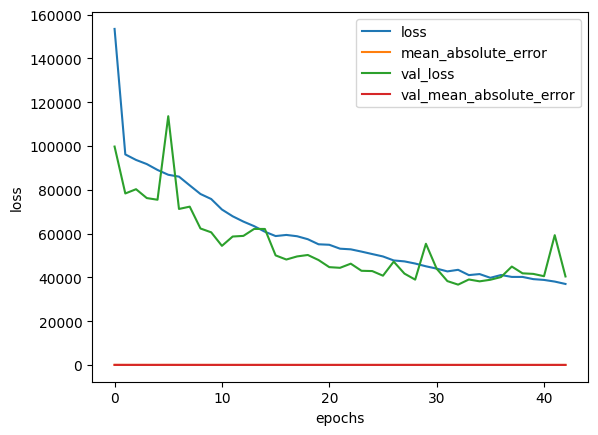

In [ ]:
# Visualize the learning curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");